# Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information: 

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park. 

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is
already split into a training set and test set.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')

# X Train
Xt = d['Xt'] #"livebait","camper","persons","child"
# X Test
Xte = d['Xte']
# y Train
yt = d['yt']
# y Test
yte = d['yte']

a) Do a linear regression by creating a design matrix with the intercept term and use the formula given in the lecture
to determine the coefficients on the training set.

In [ ]:
Xt_df = pd.DataFrame(Xt)
Xt_df.columns = ["livebait","camper","persons","child"]

# add intercept
intercept = np.ones(len(Xt_df))
Xt_df.insert(0, "intercept", intercept)

Xt_df

Xt = np.asarray(Xt_df)


In [ ]:
# w = np.ones((5))

XTX = np.matmul(Xt.T,Xt)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, Xt.T)
w = np.matmul(XTXIXT,yt)

print("Intercept = {}, Weights = {}".format(w[0], w[1:]))

Intercept = -8.492228208419766, Weights = [ 2.4822138   2.95430727  4.64953914 -5.47160051]


b) Repeat a) but this time with `LinearRegression` from `sklearn.linear_model`

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False).fit(Xt, yt)
coefficients = lin_reg.coef_

print("Intercept = {}, Weights = {}".format(coefficients[0], coefficients[1:]))


Intercept = -8.492228208419723, Weights = [ 2.4822138   2.95430727  4.64953914 -5.47160051]


Result: array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])
Don't forget the intercept, you should have 5 numbers!

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset.
For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian
with constant variance $\sigma^2$. Estimate $\sigma^2$ using the variance of the residuals. Use the variance estimation
with $1/N$.

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

In [25]:
intercept = coefficients[0]
weights = coefficients[1:]

y_hat = intercept + np.sum(weights.T * Xte, axis=1)
print(y_hat)

residuals = yte - y_hat

MSE = (1 / len(Xte)) * np.sum(np.square(residuals))
RMSE = np.sqrt(MSE)

print("RMSE = " + str(RMSE))

[ 5.45638921  2.46700249 10.10592835  3.28906387 -1.36047527 -2.18253664
  5.42130976  2.46700249  1.593832    6.24337113 -2.18253664  1.64494112
  6.24337113  6.24337113 -3.00459802 -2.18253664  3.76115733  1.593832
 -1.36047527 10.89291027  0.77177062  2.46700249 -3.00459802  1.593832
  6.24337113  1.593832   -0.8883818   7.11654163 -1.36047527 -2.18253664
  3.28906387 10.0708489   0.77177062  1.64494112  6.24337113  6.24337113
  0.77177062 -1.36047527 10.89291027 15.54244941  2.93909596  1.64494112
 10.0708489  10.0708489   0.77177062  7.11654163 15.54244941  0.77177062
  3.28906387  5.42130976]
RMSE = 8.588126386734233


In [ ]:
import scipy

# NLL

variance = np.var(residuals)
sd = np.sqrt(variance)

print("Variance = " + str(variance))

NLL = -(1 / len(yte)) * np.sum(scipy.stats.norm.logpdf(yte, loc=y_hat, scale=sd))

print("NLL = " + str(NLL))

Variance = 73.48030359919811
NLL = 3.569322638168202


d) For the testset: plot the predicted mean number of fish caught ($\mu$) against observed number of fish caught.
Further include the 2.5 and 97.5 precentile of p(y|x), the conditional predictive distribution (CPD) of $y$ for a
given $x$. Why is a Gaussian not ideal for that kind of data?

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$

In [ ]:
mu = np.mean(y_hat)
# mu_array = np.array([mu] * len(y_hat))
# mu_array

percentile1 = mu + 1.96 * sd
percentile2 = mu - 1.96 * sd

print(percentile1)
print(percentile2)

20.386234889107314
-13.216261107867638


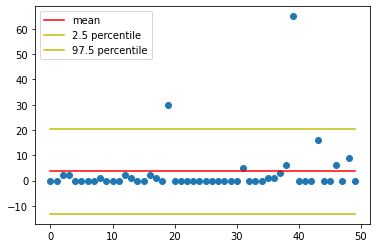

In [ ]:
import matplotlib.pyplot as plt

n_test = len(yte)
x = range(n_test)

scatter_plot = plt.scatter(x=x, y=yte)
plt.plot(x, [mu] * n_test , 'r', label="mean")
plt.plot(x, [percentile1] * n_test , 'y', label="2.5 percentile")
plt.plot(x, [percentile2] * n_test , 'y', label="97.5 percentile")
plt.legend()
plt.show()


e) This data is count data. Count data has only positive values and also the distribution is discrete.
You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too.
A Gaussian as a CPD is therefore not ideal.

Now use a Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by 
$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 log(p(k)) = -\mu  + k \cdot \log(\mu) - log(k!)
$$

with $\mu$ being the expectation. In our case the average number of fish expected.

In the case of the probabilistic interpretation of the linear regression, $y_i$ for a given $x_i$ is distributed
like a Gaussian. The paramter $\mu_i$ from $N(\mu_i,\sigma^2)$ has been determined from $x_i$ via $\mu_i= \beta^T \cdot x_i$ by minimizing the NLL.

A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

In [ ]:
Xt # X train mit intercept

mu = np.exp(np.matmul(Xt, w))
ret = np.zeros_like(Xt)

for i in range(Xt.shape[0]):
    mux = Xt[i] * mu[i]
    ret[i] = -mux + yt[i] * Xt[i]

mean_ret = np.mean()

df = pd.DataFrame(ret)
df

TypeError: ignored

In [17]:
def gradNLL(yt, Xt, w):
    mu = np.exp(np.matmul(Xt,w)) # mu positiv machen

    ret = np.zeros_like(Xt)
    for i in range(Xt.shape[0]):
        mux = Xt[i] * mu[i]
        ret[i] = -mux + yt[i] * Xt[i]
    return np.mean(ret, axis=0)

# NLL(yt, Xt,np.ones(5))
np.round(gradNLL(yt, Xt,np.ones(5)),2)
#1518.61, 1403.99, 1171.02, 5701.91, 3258.7


array([-1518.61, -1403.99, -1171.02, -5701.91, -3258.7 ])

In [18]:
w = np.ones(5)

for i in range(10000):

    w = w + 0.001 * gradNLL(yt, Xt, w)

w


array([-1.74007527,  0.56500613,  0.66091814,  0.93220074, -1.62023821])

f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to
calculate the percentiles.

In [21]:
print(y_hat)
mu = np.mean(y_hat)
print(mu)

percentile1 = scipy.stats.poisson.ppf(0.025, mu)
percentile2 = scipy.stats.poisson.ppf(0.975, mu)

print(percentile1)
print(percentile2)

[ 5.45638921  2.46700249 10.10592835  3.28906387 -1.36047527 -2.18253664
  5.42130976  2.46700249  1.593832    6.24337113 -2.18253664  1.64494112
  6.24337113  6.24337113 -3.00459802 -2.18253664  3.76115733  1.593832
 -1.36047527 10.89291027  0.77177062  2.46700249 -3.00459802  1.593832
  6.24337113  1.593832   -0.8883818   7.11654163 -1.36047527 -2.18253664
  3.28906387 10.0708489   0.77177062  1.64494112  6.24337113  6.24337113
  0.77177062 -1.36047527 10.89291027 15.54244941  2.93909596  1.64494112
 10.0708489  10.0708489   0.77177062  7.11654163 15.54244941  0.77177062
  3.28906387  5.42130976]
3.584986890619839
0.0
8.0


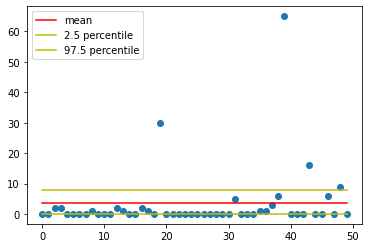

In [ ]:
n_test = len(yte)
x = range(n_test)

scatter_plot = plt.scatter(x=x, y=yte)
plt.plot(x, [mu] * n_test , 'r', label="mean")
plt.plot(x, [percentile1] * n_test , 'y', label="2.5 percentile")
plt.plot(x, [percentile2] * n_test , 'y', label="97.5 percentile")
plt.legend()
plt.show()